## EDA - 01 - Like and Dislike
- 조회수와 좋아요, 싫어요의 관계

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

%matplotlib inline

### Data Load

In [2]:
train = pd.read_csv("train.csv")
train.columns = ['dislike', 'category', 'comments', 'like', 'play_time',
       'subscribers', 'tag', 'title', 'top_comment', 'upload_date', 'url',
       'views', 'crawl_date']

print(train.shape)
train.head(3)

(5177, 13)


,dislike,category,comments,like,play_time,subscribers,tag,title,top_comment,upload_date,url,views,crawl_date
0,277,게임,"댓글 4,919개",1.3만,0:14,151만,"['마인크래프트', 'Minecraft', '샌드박스 네트워크', '샌드박스', '...",마크판 거지키우기 업그레이드 *크리에이터* 키우기! - 마인크래프트 - [잠뜰],그동안 여러분이 잠뜰TV에서 가장 재밌게 본 영상은?!\n댓글에 많이 남겨주시고 좋...,게시일: 2018. 8. 17.,https://www.youtube.com/watch?v=azoDJNPRU7s&li...,"조회수 579,949회",2018.08.23
1,278,게임,"댓글 4,964개",8.7천,0:15,236만,"['도티', '도티 마피아', '도티 머더', '마피아 머더', 'mafia', '...","직업 머더 ""곤충""능력 특집 (부제: 파브르와 저승벌레 팡수)",다음 컨셉은 아이스 크림 어떨까요?예를 들면스크류바:술래가 한 대 치면 술래를 5초...,게시일: 2018. 8. 20.,https://www.youtube.com/watch?v=-BnUuHgUK5Q&li...,"조회수 451,676회",2018.08.23
2,561,게임,"댓글 5,262개",2.3만,6:47,246만,"['보겸', '보겸TV', 'bokyem', '도티', '롤', '오버워치', '원...",14번의”아디오스” ㄷ1지고싶으면 들이대봐 드루와,모듀 ㅂㅇㄹ ^_^* \nㅋㅋㅋ 역대 최대킬 ㅋㅋㅋ\n고마워 ^_^+ 가조쿠들 ㅋㅋ...,게시일: 2018. 8. 18.,https://www.youtube.com/watch?v=v0rDCGLcnpU&li...,"조회수 955,578회",2018.08.23


### Upload_date
- 게시년, 월, 일

In [3]:
ls=list(train["upload_date"])

In [4]:
del_list = []
for i, s in enumerate(ls):
    if "시간시간" in s:
        print(s)
        del_list.append(i)
del_list

실시간 스트림: 14시간시간 전
실시간 스트림: 10시간시간 전
실시간 스트림: 12시간시간 전


[3275, 3331, 3345]

In [5]:
train = train.drop(del_list)
train.shape

(5174, 13)

In [6]:
train = train.reset_index(drop=True)

In [7]:
s = '게시일: 2014. 2. 26.'

In [8]:
s[5:-1].replace(" ","").split(".")

['2014', '2', '26']

In [9]:
def upload_date_clear_year(date):
    if len(date) > 20:
        return int(date[14:-1].replace(" ","").split(".")[0])
    else:
        return int(date[5:-1].replace(" ","").split(".")[0])

def upload_date_clear_month(date):
    if len(date) > 20:
        return int(date[14:-1].replace(" ","").split(".")[1])
    else:
        return int(date[5:-1].replace(" ","").split(".")[1])

def upload_date_clear_day(date):
    if len(date) > 20:
        return int(date[14:-1].replace(" ","").split(".")[2])
    else:
        return int(date[5:-1].replace(" ","").split(".")[2])

In [10]:
train["upload_date_year"] = train["upload_date"].apply(upload_date_clear_year)
train["upload_date_month"] = train["upload_date"].apply(upload_date_clear_month)
train["upload_date_day"] = train["upload_date"].apply(upload_date_clear_day)

In [11]:
train[["upload_date_year", "upload_date_month", "upload_date_day"]].head()

,upload_date_year,upload_date_month,upload_date_day
0,2018,8,17
1,2018,8,20
2,2018,8,18
3,2018,8,18
4,2018,8,21


### Crawl_date

In [12]:
s = '2014.2.26'

In [13]:
int(s.split(".")[0])

2014

In [14]:
def crawl_data_clear_year(date):
    return int(date.split(".")[0])

def crawl_data_clear_month(date):
    return int(date.split(".")[1])

def crawl_data_clear_day(date):
    return int(date.split(".")[2])

In [15]:
train["crawl_date_year"] = train["crawl_date"].apply(crawl_data_clear_year)
train["crawl_date_month"] = train["crawl_date"].apply(crawl_data_clear_month)
train["crawl_date_day"] = train["crawl_date"].apply(crawl_data_clear_day)

In [16]:
train[["crawl_date_year", "crawl_date_month", "crawl_date_day"]].head()

,crawl_date_year,crawl_date_month,crawl_date_day
0,2018,8,23
1,2018,8,23
2,2018,8,23
3,2018,8,23
4,2018,8,23


### Uploaded days

In [17]:
from datetime import date

for idx in tqdm(range(0, len(train))):
    d0 = date(train["upload_date_year"].loc[idx], train["upload_date_month"].loc[idx], train["upload_date_day"].loc[idx])
    d1 = date(train["crawl_date_year"].loc[idx], train["crawl_date_month"].loc[idx], train["crawl_date_day"].loc[idx])
    train.loc[idx, "uploaded_days"] = (d1 - d0).days

100%|██████████| 5174/5174 [00:03<00:00, 1370.29it/s]


In [18]:
train[["uploaded_days"]].head()

,uploaded_days
0,6.0
1,3.0
2,5.0
3,5.0
4,2.0


### Views
- 조회수 ( 일평균 조회수를 target 값으로 사용 )
- 예측할 target

In [19]:
def views_clear(view):
    if view == '조회수 없음':
        return 0
    else:
        return int(view[4:-1].replace(",",""))

In [20]:
train["views"] = train["views"].apply(views_clear)

In [21]:
train["views"].head()

0    579949
1    451676
2    955578
3    191211
4    162253
Name: views, dtype: int64

In [22]:
train["views"] = train["views"] / train["uploaded_days"]

In [23]:
train["views"].head()

0     96658.166667
1    150558.666667
2    191115.600000
3     38242.200000
4     81126.500000
Name: views, dtype: float64

### Dislike
- '싫어요'라는 텍스트만 있는 경우 값은 url확인 결과 '0'인 경우이다.

In [24]:
train[train["dislike"]=='싫어요'].head(1)

,dislike,category,comments,like,play_time,subscribers,tag,title,top_comment,upload_date,url,views,crawl_date,upload_date_year,upload_date_month,upload_date_day,crawl_date_year,crawl_date_month,crawl_date_day,uploaded_days
50,싫어요,엔터테인먼트,0,좋아요,6:06,0,[],사람들 멘붕 시키려고 돌진했다가 캐리해버린 영상ㅋㅋㅋㅋㅋ | 좀비고 | 좀비고등학교...,NaN,게시일: 2018. 8. 15.,https://www.youtube.com/watch?v=35yrf7vZmIk&in...,15746.875,2018.08.23,2018,8,15,2018,8,23,8.0


In [25]:
train.loc[train["dislike"]=='싫어요', 'dislike'] = '0'

In [26]:
train[train["dislike"]=='싫어요'].head(1)

,dislike,category,comments,like,play_time,subscribers,tag,title,top_comment,upload_date,url,views,crawl_date,upload_date_year,upload_date_month,upload_date_day,crawl_date_year,crawl_date_month,crawl_date_day,uploaded_days


In [27]:
def hand_clear(s):
    '''
    천, 만으로 표시된 값 숫자로 변경
    '''
    if s[-1] == '천':
        return float(s[:-1]) * 1000
    elif s[-1] == '만':
        return float(s[:-1]) * 10000
    else:
        return float(s)

In [28]:
train["dislike"] = train["dislike"].apply(hand_clear)

### Like
- '좋아요'라는 텍스트만 있는 경우 값은 url확인 결과 '0'인 경우이다.

In [29]:
train[train["like"]=='좋아요'].head(1)

,dislike,category,comments,like,play_time,subscribers,tag,title,top_comment,upload_date,url,views,crawl_date,upload_date_year,upload_date_month,upload_date_day,crawl_date_year,crawl_date_month,crawl_date_day,uploaded_days
50,0.0,엔터테인먼트,0,좋아요,6:06,0,[],사람들 멘붕 시키려고 돌진했다가 캐리해버린 영상ㅋㅋㅋㅋㅋ | 좀비고 | 좀비고등학교...,NaN,게시일: 2018. 8. 15.,https://www.youtube.com/watch?v=35yrf7vZmIk&in...,15746.875,2018.08.23,2018,8,15,2018,8,23,8.0


In [30]:
train.loc[train["like"]=='좋아요', 'like'] = '0'

In [31]:
train[train["like"]=='좋아요'].head(1)

,dislike,category,comments,like,play_time,subscribers,tag,title,top_comment,upload_date,url,views,crawl_date,upload_date_year,upload_date_month,upload_date_day,crawl_date_year,crawl_date_month,crawl_date_day,uploaded_days


In [32]:
train["like"] = train["like"].apply(hand_clear)

In [33]:
train[["dislike", "like"]].head()

,dislike,like
0,277.0,13000.0
1,278.0,8700.0
2,561.0,23000.0
3,404.0,1100.0
4,36.0,3400.0


### Like & Dislike
- Like and Dislike means that the people who watch video judged the video is good or not

**다중공선성(multicollinearity)란 독립 변수의 일부가 다른 독립 변수의 조합으로 표현될 수 있는 경우이다. 독립 변수들이 서로 독립이 아니라 상호상관관계가 강한 경우에 발생한다. 이는 독립 변수의 공분산 행렬이 full rank 이어야 한다는 조건을 침해한다.**

In [34]:
dfX = train[["dislike", "like"]]
dfy = train["views"]

In [35]:
df = pd.concat([dfy, dfX], axis=1)
df.head()

,views,dislike,like
0,96658.166667,277.0,13000.0
1,150558.666667,278.0,8700.0
2,191115.600000,561.0,23000.0
3,38242.200000,404.0,1100.0
4,81126.500000,36.0,3400.0


In [36]:
dfX.corr()

,dislike,like
dislike,1.000000,0.802232
like,0.802232,1.000000


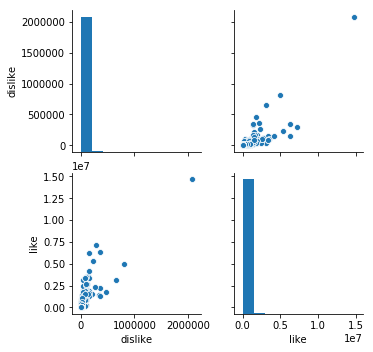

In [37]:
sns.pairplot(dfX)

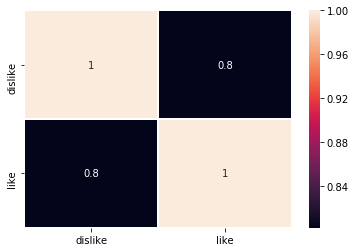

In [38]:
sns.heatmap(dfX.corr(), linewidths=.5, annot=True)

In [39]:
import statsmodels.api as sm

model = sm.OLS.from_formula("views ~ "
                            "like + dislike", data=df)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  views   R-squared:                       0.355
Model:                            OLS   Adj. R-squared:                  0.355
Method:                 Least Squares   F-statistic:                     1424.
Date:                Sun, 26 Aug 2018   Prob (F-statistic):               0.00
Time:                        23:34:58   Log-Likelihood:                -66783.
No. Observations:                5174   AIC:                         1.336e+05
Df Residuals:                    5171   BIC:                         1.336e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7091.1485   1387.514      5.111      0.0

**다중 공선성이 있으면 독립변수의 공분산 행렬의 조건수(conditional number)가 증가한다. 조건수는 독립변수가 스케일링이 되어 있지 않아도 증가하므로 일단 스케일링을 통해 조건수를 감소시킨다.**

In [40]:
scale_model = sm.OLS.from_formula("views ~ "
                            "scale(like) + scale(dislike)", data=df)
result = scale_model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  views   R-squared:                       0.355
Model:                            OLS   Adj. R-squared:                  0.355
Method:                 Least Squares   F-statistic:                     1424.
Date:                Sun, 26 Aug 2018   Prob (F-statistic):               0.00
Time:                        23:34:59   Log-Likelihood:                -66783.
No. Observations:                5174   AIC:                         1.336e+05
Df Residuals:                    5171   BIC:                         1.336e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       2.178e+04   1357.073     16.

**독립 변수가 서로 의존하게 되면 이른바 과최적화(over-fitting) 문제가 발생하여 회귀 결과의 안정성을 해치게 된다. 이를 방지하는 방법들은 다음과 같다.**

1. 변수 선택법으로 의존적인 변수 삭제
2. PCA(principal component analysis) 방법으로 의존적인 성분 삭제
3. 정규화(regularized) 방법 사용

### VIF
- 다중 공선성을 없애는 가장 기본적인 방법은 다른 독립변수에 의존하는 변수를 없애는 것이다. 가장 의존적인 독립변수를 선택하는 방법으로는 VIF(Variance Inflation Factor)를 사용할 수 있다. VIF는 독립변수를 다른 독립변수로 선형회귀한 성능을 나타낸 것이다.

#### dilike와 like는 서로 비슷한 의존정도를 보여준다.

In [41]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(dfX.values, i) for i in range(dfX.shape[1])]
vif["features"] = dfX.columns
vif

,VIF Factor,features
0,2.802788,dislike
1,2.802788,like


#### Like만 사용한 경우

In [42]:
scale_model = sm.OLS.from_formula("views ~ "
                            "scale(like)", data=df)
result = scale_model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  views   R-squared:                       0.345
Model:                            OLS   Adj. R-squared:                  0.345
Method:                 Least Squares   F-statistic:                     2720.
Date:                Sun, 26 Aug 2018   Prob (F-statistic):               0.00
Time:                        23:34:59   Log-Likelihood:                -66825.
No. Observations:                5174   AIC:                         1.337e+05
Df Residuals:                    5172   BIC:                         1.337e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    2.178e+04   1367.973     15.918      

#### Dislike만 사용한 경우

In [43]:
scale_model = sm.OLS.from_formula("views ~ "
                            "scale(dislike)", data=df)
result = scale_model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  views   R-squared:                       0.168
Model:                            OLS   Adj. R-squared:                  0.168
Method:                 Least Squares   F-statistic:                     1043.
Date:                Sun, 26 Aug 2018   Prob (F-statistic):          1.16e-208
Time:                        23:34:59   Log-Likelihood:                -67443.
No. Observations:                5174   AIC:                         1.349e+05
Df Residuals:                    5172   BIC:                         1.349e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       2.178e+04   1541.472     14.

#### Like와 Dislike의 합
- Like와 Dislike 모두 결국에는 동영상을 시청하였다는 증거 중 하나 이기때문에 더해서 조회수와의 상관관계를 확인해 보았다.

In [44]:
df["total_like_dislike"] = df["like"] + df["dislike"]
df["total_like_dislike"].head()

0    13277.0
1     8978.0
2    23561.0
3     1504.0
4     3436.0
Name: total_like_dislike, dtype: float64

In [45]:
df[['views', 'total_like_dislike']].corr()

,views,total_like_dislike
views,1.000000,0.580599
total_like_dislike,0.580599,1.000000


In [46]:
model = sm.OLS.from_formula("views ~ "
                            "total_like_dislike", data=df)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  views   R-squared:                       0.337
Model:                            OLS   Adj. R-squared:                  0.337
Method:                 Least Squares   F-statistic:                     2630.
Date:                Sun, 26 Aug 2018   Prob (F-statistic):               0.00
Time:                        23:34:59   Log-Likelihood:                -66855.
No. Observations:                5174   AIC:                         1.337e+05
Df Residuals:                    5172   BIC:                         1.337e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           8876.4223   1398

In [47]:
scale_model = sm.OLS.from_formula("views ~ "
                            "scale(total_like_dislike)", data=df)
result = scale_model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  views   R-squared:                       0.337
Model:                            OLS   Adj. R-squared:                  0.337
Method:                 Least Squares   F-statistic:                     2630.
Date:                Sun, 26 Aug 2018   Prob (F-statistic):               0.00
Time:                        23:34:59   Log-Likelihood:                -66855.
No. Observations:                5174   AIC:                         1.337e+05
Df Residuals:                    5172   BIC:                         1.337e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

### 결론 : 전체적인 성능은 Like와 Dislike를 따로 나눠서 동시에 쓰는 것이 조금이라도 더 나은 결과인 것을 알수 있다.